# Thinking1:既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？

### 答:1.基于内容的相似度推荐是静态的,需要对物品进行打标签,然后依据物品与用户的历史喜欢物品的相似度进行推荐. 
### 2.协同过滤算法旨在通过用户的相似特征,为用户推荐相似度大用户喜欢的商品和内容,是一个动态的推荐方式
### 3.两者的区别在于:基于内容的相似度推荐Content-based是基于静态的物理属性来进行推荐的,其属性不会发生变化;而协同过滤算法不管是User-based还是Item-based都是通过用户行为来进行推荐的,与物品本身的内容标签无关.更能够反映用户喜欢程度的变化.推荐的物品更有效果.

# Tinking2: 你需要推荐系统么？哪些情况下不需要推荐系统？

### 答:推荐系统在用户多时,得到的效益更多,而在用户数量小时,得到的效果并不是特别明显,假设推荐系统按照比例增加,用户数量大时显然得到的用户增长会更多.

# Thinking3:如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？

### 答:问题主要在于背景音乐的干扰,可能会使将视频的内容错误的打上音乐本身的标签,如歌曲为爱情则将视频打上爱情的标签,但很有可能视频内容并不是关于爱情的内容.

# Action1: 针对mnist数据集进行分类，采用CART决策树（工具使用sklearn中的CART）

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
手写数字为：0
决策树准确率为：0.8688888888888889


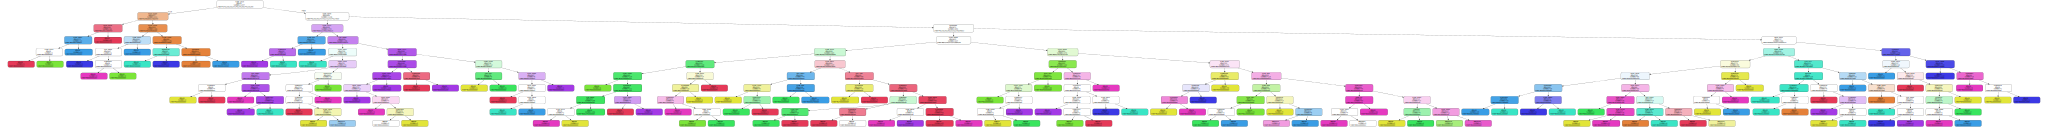

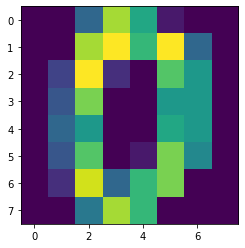

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


#加载数据
digits = load_digits()
data = digits.data
#显示第一幅图片的数据
print(digits.images[0])
#显示第一幅图片
plt.imshow(digits.images[0])
print('手写数字为：{}'.format(digits.target[0]))

#分割数据
train_x,test_x,train_y,test_y = train_test_split(data, digits.target, test_size = 0.25, random_state = 33)

#数据规范化
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)


#创建决策树分类
model = DecisionTreeClassifier(min_impurity_decrease = 0.0006, max_depth = 10, random_state = 33)
clf = model.fit(train_ss_x,train_y)
pre_y = model.predict(test_ss_x)
print('决策树准确率为：{}'.format(accuracy_score(pre_y, test_y)))


# import numpy as np
# n = np.linspace(0.000001, 0.0001, 1000)
# accuracy_list = []
# for i in range(1000):
#     model = DecisionTreeClassifier(min_impurity_decrease = n[i], max_depth = 10, random_state = 33)
#     clf = model.fit(train_ss_x,train_y)
#     pre_y = model.predict(test_ss_x)
#     accuracy_list.append(accuracy_score(pre_y, test_y))
# accuracy_list = np.array(accuracy_list) 
# best_decrease = 0.000001 + 0.0000001 * accuracy_list.argmax()
# print('best_decrease:{}, accuracy:{}'.format(best_decrease, accuracy_list.max()))


#数据导出并画出树
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("minist")
dot_data = tree.export_graphviz(clf, out_file=None,   
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



## 决策树理论
https://www.cnblogs.com/keye/p/10267473.html  
## CART决策树
https://www.cnblogs.com/keye/p/10564914.html  
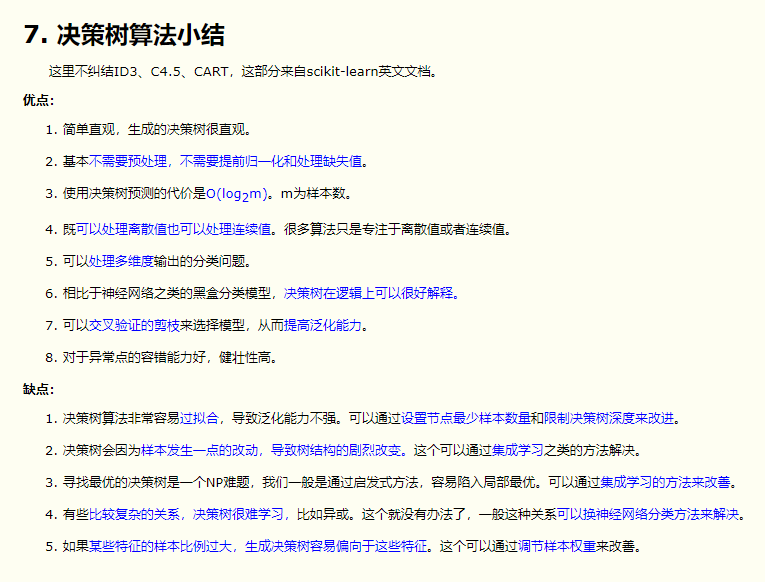  
### 决策树官方文档
https://scikit-learn.org/stable/modules/tree.html#classification  
### 决策树参数列表
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
### 剪枝策略：
https://zhuanlan.zhihu.com/p/76709712